In [ ]:
#import all the useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [ ]:
#Load the titanic dataset from seaborn
df= sns.load_dataset('titanic')

In [ ]:
#Identify the missing values in columns
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
df.isnull()
#False means they cell is not null
#True means the cell does not has any value.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.shape
#returns a tuple (rows,columns) for the dataset.

(891, 15)

In [ ]:
#Rows that only has a value (Missing values)
NaN_count = df.isnull().sum()
rows_with_missing_val = NaN_count[NaN_count > 0]
rows_with_missing_val

,0
age,177
embarked,2
deck,688
embark_town,2


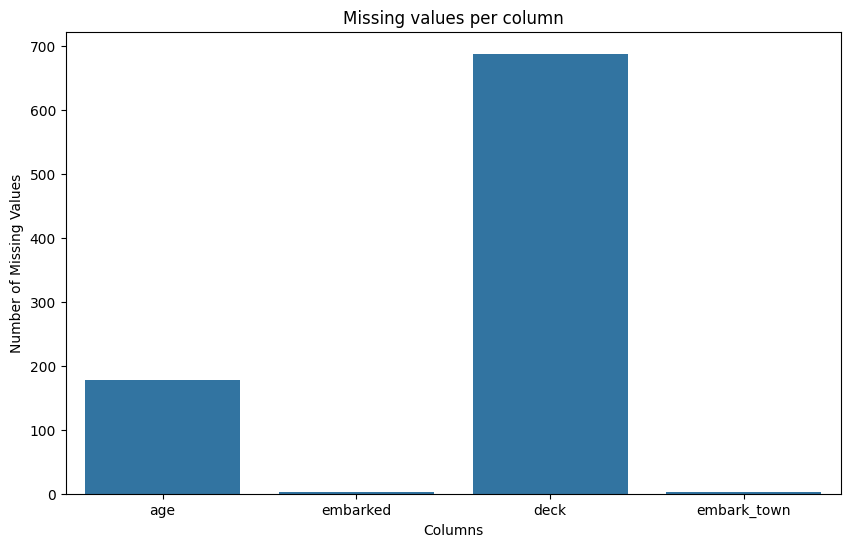

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=rows_with_missing_val.index, y=rows_with_missing_val.values)
plt.title('Missing values per column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

In [ ]:
#Filling missing values for age, deck, embark_town and embarked.
#use mean() for all the numeric data.
#use mode() for categorical data.
df['age'] = df['age'].fillna(df['age'].mean())
df['deck'] = df['deck'].fillna(df['deck'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


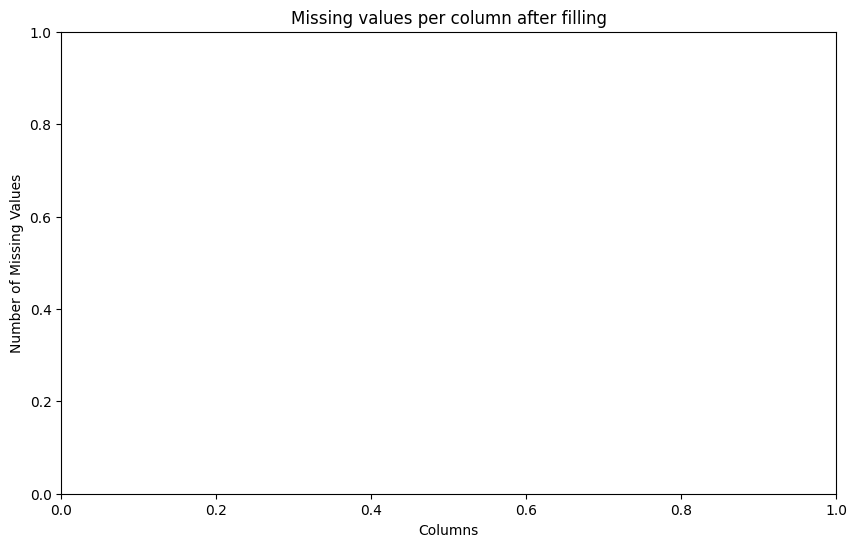

In [ ]:
NaN_count = df.isnull().sum()
rows_with_missing_val_after_fill = NaN_count[NaN_count > 0]

plt.figure(figsize=(10,6))
sns.barplot(x=rows_with_missing_val_after_fill.index, y=rows_with_missing_val_after_fill.values)
plt.title('Missing values per column after filling')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

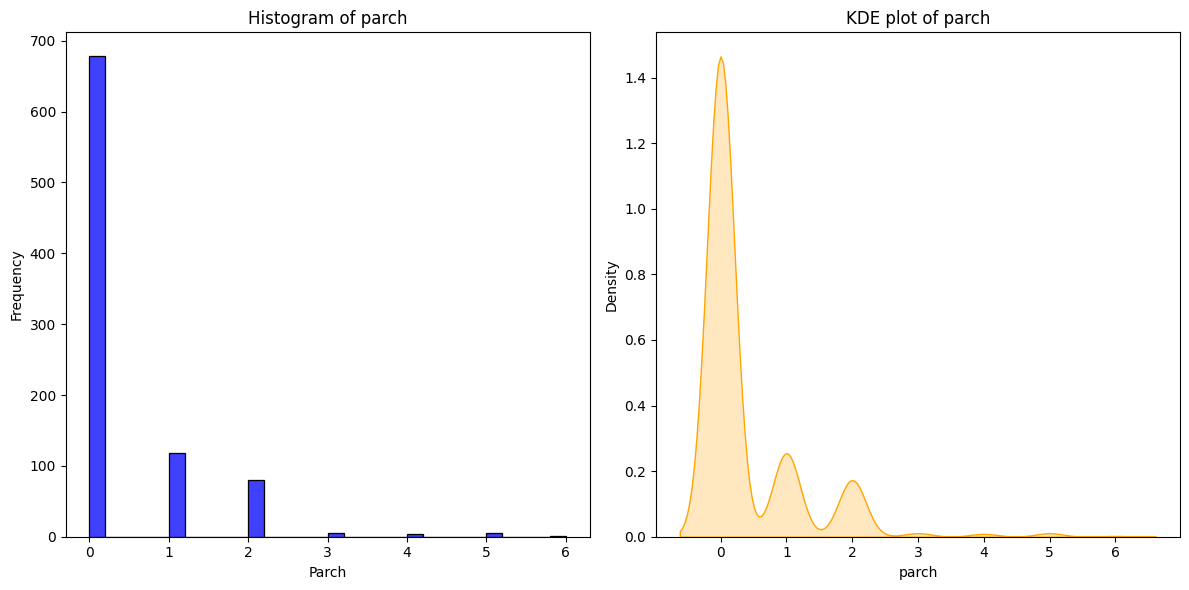

In [ ]:
plt.figure(figsize=(12,6))

#Histogram
plt.subplot(1,2,1)
sns.histplot(df['parch'], bins=30, kde=False, color='blue', edgecolor = 'black')
plt.title('Histogram of parch')
plt.xlabel('Parch')
plt.ylabel('Frequency')

#KDE plot
plt.subplot(1,2,2)
sns.kdeplot(df['parch'], fill = True, color = 'orange')
plt.title('KDE plot of parch')
plt.xlabel('parch')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [ ]:
#from scipy import stats
#incase you have not installed stats before
#Apply Box-Cox Transformation
#Box-Cox requires positive data, so we ensure 'parch' is > 0.
#Since 'parch' is count data, we add a small constant.
df['parch_shifted'] = df['parch'] + 1
#shift by 1 to avoid zeros
df['parch_boxcox'],